# [CSCI 3397/PSYC 3317] Lab 5a: Machine Learning Overview

**Posted:** Thursday, February 15, 2022

**Due:** Thursday, February 24, 2022

__Total Points__: 6 pts

__Submission__: please rename the .ipynb file as __\<your_username\>_lab5a.ipynb__ before you submit it to canvas. Example: weidf_lab5a.ipynb.

# 0. Load data

[[MedMNIST]](https://medmnist.com/)

In [1]:
! mkdir lab5/
! wget https://zenodo.org/record/5208230/files/pathmnist.npz -O lab5/pathmnist.npz

--2022-02-16 00:35:59--  https://zenodo.org/record/5208230/files/pathmnist.npz
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205615438 (196M) [application/octet-stream]
Saving to: ‘lab5/pathmnist.npz’

lab5/pathmnist.npz  100%[===================>] 196.09M  1.80MB/s    in 56s     

2022-02-16 00:36:57 (3.49 MB/s) - ‘lab5/pathmnist.npz’ saved [205615438/205615438]



In [2]:
import numpy as np
import matplotlib.pyplot as plt

def tensorTo2D(tensor):
    # only keep the first dimension: image index
    # reshape the rest dimensions into one dimension
    return tensor.reshape(tensor.shape[0], -1)

data = np.load('lab5/pathmnist.npz')
X_train = data['train_images'][::10]
Y_train = data['train_labels'][::10]
X_test = data['test_images'][::10]
Y_test = data['test_labels'][::10]

# ML assumes 2D input: N x feature input
X_train_2d = tensorTo2D(X_train)
X_test_2d = tensorTo2D(X_test)

num_label = Y_train.max() + 1

print('Train data size', X_train.shape)
print('Test data size', X_test.shape)
ui, uc = np.unique(Y_train, return_counts=True)
print('#label', num_label)
print('Train label counts', uc)

Train data size (9000, 28, 28, 3)
Test data size (718, 28, 28, 3)
#label 9
Train label counts [ 879  954 1040 1044  821 1245  775  927 1315]


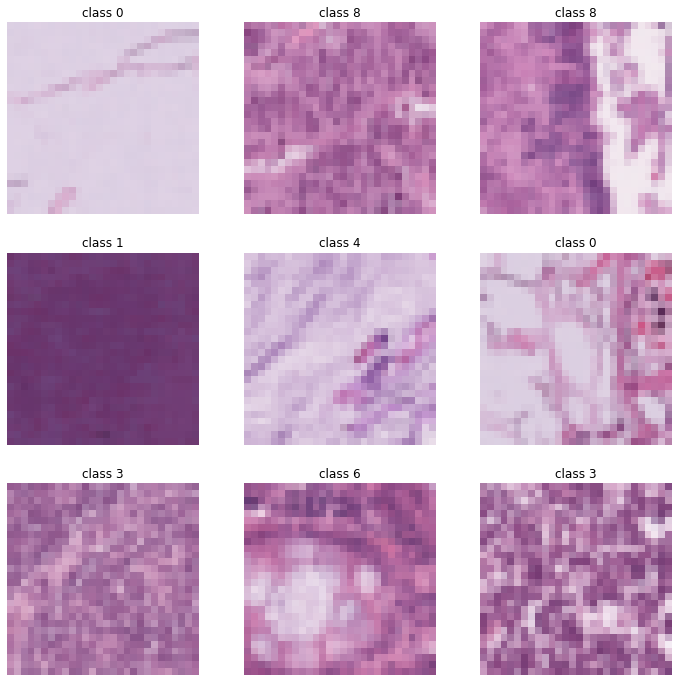

In [3]:
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
    plt.title('class %d' % Y_train[i])

# 1. Classification/Regression

Lec. 8, Page 21-28
K-nearest-neighbor classification method: 
[[Sklearn documentation]](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
[[Explanation]](https://www.machinecurve.com/index.php/2020/04/16/how-to-perform-k-means-clustering-with-python-in-scikit/)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
# train the model
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train_2d, Y_train)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [5]:
# test the model
knn_predictions = knn.predict(X_test_2d)

In [6]:
# evaluation
acc = (knn_predictions-Y_test==0).sum()/len(Y_test)
print('Test accuracy', acc)

Test accuracy 76.508356545961


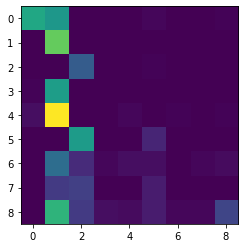

In [7]:
# evaluation: confusion matrix (break down results for each class)
from sklearn.metrics import confusion_matrix
# evaluate the model
cm = confusion_matrix(Y_test, knn_predictions)
plt.imshow(cm)

# 2. Clustering
Kmeans clustering method: 
[[Sklearn documentation]](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
[[Explanation]](https://www.machinecurve.com/index.php/2020/04/16/how-to-perform-k-means-clustering-with-python-in-scikit/)

Lec. 8, Page 29-30

In [8]:
# model training
from sklearn.cluster import KMeans
num_cluster = 5
max_iter = 10000
kmeans = KMeans(n_clusters = num_cluster, max_iter=max_iter)
cluster_labels = kmeans.fit_predict(X_train_2d)

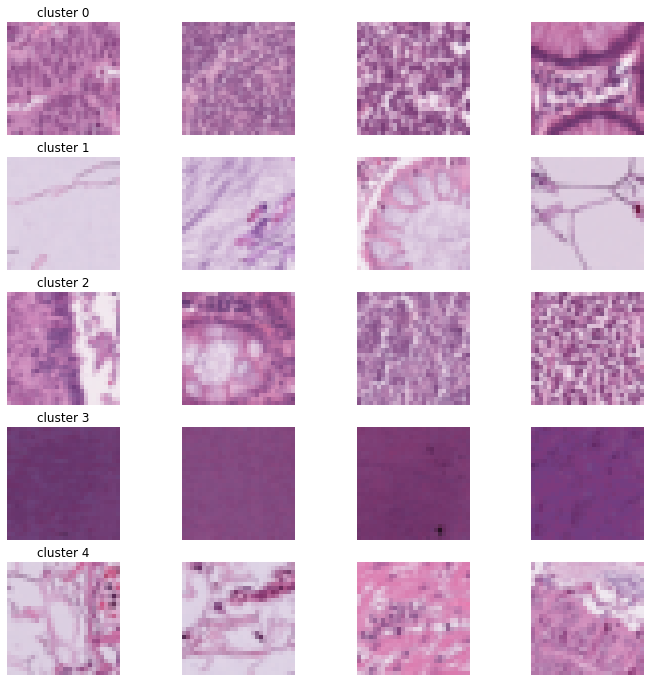

In [9]:
# visualization
num_disp = 4
plt.figure(figsize=(12, 12))
for i in range(num_cluster):
    index = np.where(cluster_labels==i)[0]
    for j in range(num_disp):
        plt.subplot(num_cluster, num_disp, i*num_disp+j+1)
        plt.imshow(X_train[index[j]])
        plt.axis('off')
        if j == 0:
            plt.title('cluster %d' % i)

# 3. Dimension Reduction

Principle component analysis (PCA) method: 
[[Sklearn documentation]](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
[[Example]](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html)
[[Explanation]](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c)

Lec. 8, Page 31-32

In [10]:
# model training
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(tensorTo2D(X_train))

X_train_2d = pca.transform(X_train_2d)

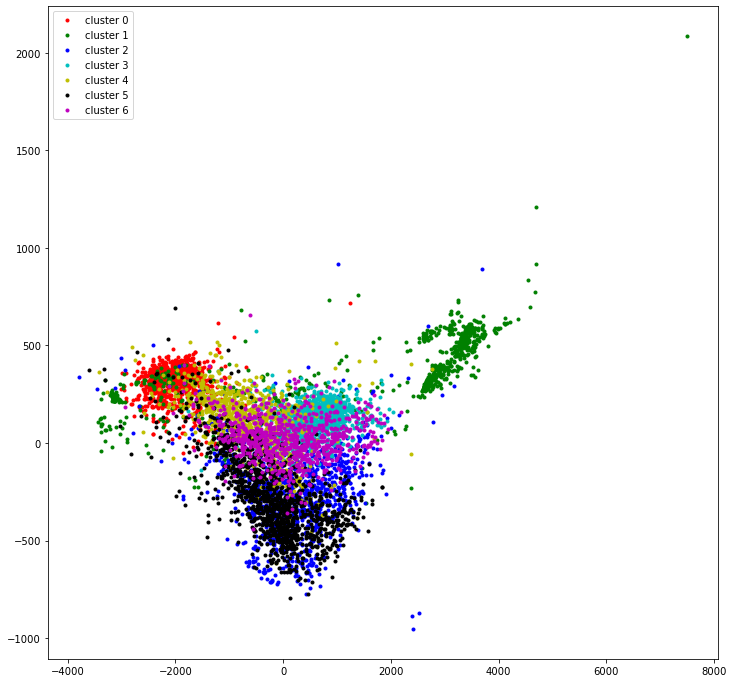

In [11]:
# visualization
cc='rgbcykm'
plt.figure(figsize=(12, 12))
for label in range(len(cc)):
    index = Y_train[:,0]==label
    plt.plot(X_train_2d[index,0], X_train_2d[index,1], cc[label]+'.')

plt.legend(['cluster %d'%x for x in range(len(cc))])

# [6 pts] Exercise

## (1) [2 pts] K-NN classification with different hyperparameters

- [1 pt] Repeat section 1 classification on the test data with $K=\{1,3,5,7,9,11\}$ (different number of neighbors)
- [2 pt] plot the test classification accuracy against $K$

In [12]:
### Your code starts here

### Your code ends here

## (2) [4 pts] Clustering after dimension reduction

- [2 pts] repeat section 3 (PCA) for the training data with output dimension=10
- [1 pt] repeat section 2 (K-means with K=5) for the 10-dim features above for the training data
- [1 pt] Visualize the clustering result as in section 2

In [13]:
### Your code starts here

### Your code ends here